package
==============

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from IPython import display
import time

continuous grey wolf optimization (CGWO)
============================
to find the minimum

2-d experiment
------------------------
target function

In [2]:
def target(x, y):
    return ((x - 3) ** 2 + (y + 4) ** 2)

intialization

In [3]:
n = 20 # number of wolf in pack
N_iter = 200 # iterations
upperBoundary = np.array([7, 7])
lowerBoundary = np.array([-7, -7])
# print(upperBoundary - lowerBoundary)

# initialize the wolf position
X = np.random.rand(n, 2) * (upperBoundary - lowerBoundary) + lowerBoundary
# for i in range(100):
#     print(f"{i}:{X[i]}")
X

array([[-3.33838674,  0.04418105],
       [-4.73585186, -6.60446023],
       [-1.87292603, -4.59843756],
       [ 0.4025521 , -6.10493656],
       [-1.75245866, -3.25406803],
       [ 1.81638336,  2.14568623],
       [-6.08224749, -6.49601265],
       [-0.61762159,  0.12405322],
       [ 0.89457202,  0.93989466],
       [ 3.59995611, -5.88091237],
       [-5.38457482, -2.2408813 ],
       [-0.93246222, -2.67231823],
       [-1.29994811,  4.14305856],
       [ 3.8891073 ,  1.97120929],
       [ 1.20381001,  4.49783753],
       [ 0.36839905, -3.06257406],
       [-5.52247201,  6.7112792 ],
       [-2.45116636,  1.2985912 ],
       [ 3.68306091,  3.72120831],
       [-4.13984371,  1.67317175]])

find $\alpha$ $\beta$ and $\delta$

In [4]:
Z = target(X[:,0], X[:,1])
# the first three indices indicate the position of the first 3 lowest value
[X_delta, X_beta, X_alpha] = X[np.argsort(Z)[:3]] # find the min
# print(Z, np.argsort(Z))
# print(target(X_delta[0], X_delta[1]))

1. update the postion of wolves
$$\overrightarrow C = 2 \overrightarrow {r_2}$$

$$\overrightarrow {D_\alpha} = |\overrightarrow {C_1} \cdot \overrightarrow {X_\alpha} - \overrightarrow X|$$

$$\overrightarrow {D_\beta} = |\overrightarrow {C_2} \cdot \overrightarrow {X_\beta} - \overrightarrow X|$$

$$\overrightarrow {D_\delta} = |\overrightarrow {C_3} \cdot \overrightarrow {X_\delta} - \overrightarrow X|$$

$$\alpha = 2 - t\frac{2}{Maxlter}$$

$$\overrightarrow A = 2\alpha \cdot \overrightarrow{r_1} - \alpha$$

$$\overrightarrow {X_1} = |\overrightarrow {X_\alpha} - \overrightarrow {A_1} \cdot \overrightarrow {D_\alpha}|$$

$$\overrightarrow {X_2} = |\overrightarrow {X_\beta} - \overrightarrow {A_2} \cdot \overrightarrow {D_\beta}|$$

$$\overrightarrow {X_3} = |\overrightarrow {X_\delta} - \overrightarrow {A_3} \cdot \overrightarrow {D_\delta}|$$

2. update the position of $\alpha$, $\beta$ and $\delta$

**Warning:** C = 2 * (np.abs(np.random.rand(n, d))%1) not C = 2 * (np.abs(np.random.rand(d, ))%1), this is because for each wolf(line in X), $A$ and $C$ is different, if we use C = 2 * (np.abs(np.random.rand(d, ))%1) then in each iteration, all of wolves will be updated by the same $A$ and $C$

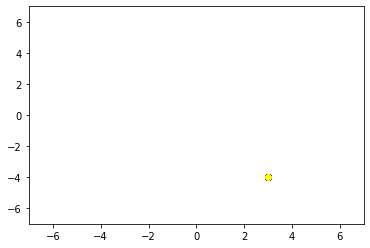

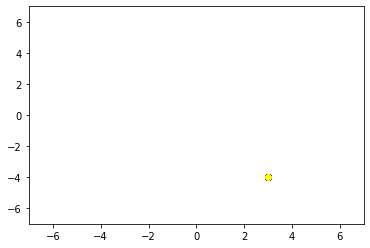

In [5]:
for t in range(N_iter):

    # 0. tune the boundary
    X = np.clip(X, lowerBoundary, upperBoundary)

    # 1. update position
    C_1 = 2 * (np.abs(np.random.rand(n, 2))%1)
    C_2 = 2 * (np.abs(np.random.rand(n, 2))%1)
    C_3 = 2 * (np.abs(np.random.rand(n, 2))%1)

    D_alpha = np.abs(C_1 * X_alpha - X) # (n, 2)
    D_beta = np.abs(C_2 * X_beta - X) # (n, 2)
    D_delta = np.abs(C_3 * X_delta - X) # (n, 2)

    alpha = 2 - t * (2 / N_iter) # scalar

    A_1 = 2 * alpha * (np.abs(np.random.rand(n, 2))%1) - alpha # (2, )
    A_2 = 2 * alpha * (np.abs(np.random.rand(n, 2))%1) - alpha # (2, )
    A_3 = 2 * alpha * (np.abs(np.random.rand(n, 2))%1) - alpha # (2, )

    X_1 = X_alpha - A_1 * D_alpha # (n, 2)
    X_2 = X_beta - A_2 * D_beta # (n, 2))
    X_3 = X_delta - A_3 * D_delta # (n, 2)

    X = (X_1 + X_2 + X_3) / 3

    # 2. update \alpha, \beta and \delta
    Z = target(X[:,0], X[:,1])
    sortIndx = np.argsort(Z)
    [X_delta, X_beta, X_alpha] = X[sortIndx[:3]]
    # if Z[sortIndx[0]] < 0.003:
    #     break;

    # plot
    # clear plot
    plt.cla()
    plt.xlim(lowerBoundary[0], upperBoundary[0]), plt.ylim(lowerBoundary[1], upperBoundary[1])
    plt.scatter(X[sortIndx[3:],0], X[sortIndx[3:],1], c='black')
    plt.scatter(X[sortIndx[0],0], X[sortIndx[0],1], c='red')
    plt.scatter(X[sortIndx[1],0], X[sortIndx[1],1], c='blue')
    plt.scatter(X[sortIndx[2],0], X[sortIndx[2],1], c='yellow')
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.5)

In [6]:
X_alpha

array([ 2.99762223, -4.005031  ])

customized dimensios
----------------------------
n -> wolves number

In [ ]:
def CGWO_min(tarFunc, upperBoundary, lowerBoundary, dim, n, maxIter, criterion):
    # reach max iteration
    reachMaxIter = True

    # initialize the wolf position
    X = np.random.rand(n, dim) * (upperBoundary - lowerBoundary) + lowerBoundary

    Z = tarFunc(X)
    # the first three indices indicate the position of the first 3 lowest value
    [X_alpha, X_beta, X_delta] = X[np.argsort(Z)[:3]] # find the min
    # print(Z, np.argsort(Z))
    # print(target(X_delta[0], X_delta[1]))

    for t in range(maxIter):

        # 0. tune the boundary
        X = np.clip(X, lowerBoundary, upperBoundary)

        # 1. update position
        C_1 = 2 * (np.abs(np.random.rand(n, dim))%1)
        C_2 = 2 * (np.abs(np.random.rand(n, dim))%1)
        C_3 = 2 * (np.abs(np.random.rand(n, dim))%1)

        D_alpha = np.abs(C_1 * X_alpha - X) 
        D_beta = np.abs(C_2 * X_beta - X)
        D_delta = np.abs(C_3 * X_delta - X)

        alpha = 2 - t * (2 / maxIter) # scalar

        A_1 = 2 * alpha * (np.abs(np.random.rand(n, dim))%1) - alpha
        A_2 = 2 * alpha * (np.abs(np.random.rand(n, dim))%1) - alpha
        A_3 = 2 * alpha * (np.abs(np.random.rand(n, dim))%1) - alpha

        X_1 = X_alpha - A_1 * D_alpha
        X_2 = X_beta - A_2 * D_beta
        X_3 = X_delta - A_3 * D_delta

        X = (X_1 + X_2 + X_3) / 3

        # 2. update \alpha, \beta and \delta
        Z = tarFunc(X)
        sortIndx = np.argsort(Z)
        [X_alpha, X_beta, X_delta] = X[sortIndx[:3]]
        if Z[sortIndx[0]] < criterion:
            # print(Z[sortIndx[0]])
            reachMaxIter = False
            break;

    return X_alpha, Z[sortIndx[0]], reachMaxIter

In [ ]:
def tarFunc(X):
    return (X[:,0] - 4) ** 2 + (X[:,1] + 3) ** 2 + (X[:,2] + 1) ** 2

upperBoundary = np.array([7, 7, 7])
lowerBoundary = np.array([-7, -7, -7])
alpha, min, r = CGWO(tarFunc, upperBoundary, lowerBoundary, 3, 20, 200, 0.0000)
print(alpha, min, r)

[ 4.00029855 -2.99917919 -1.00294295] 9.423818503831342e-06 True


binary grey wolf optimization (bGWO)
===================================
